In [19]:

import numpy as np
#from dgamod import *
from zhang_actions_mod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [20]:
nh = 6
dt = 0.15
b = 100
acciones = acciones(b,nh)
propagadores = gen_props(acciones,nh,b,dt)


Descomposicion espectral: correcta
Propagacion de autoestados: correcta


In [21]:
state = np.zeros(nh, dtype=np.complex_)
state[0] = 1.

nat_evolution = []
action_sequence = np.zeros(200,dtype= int)

for action in action_sequence:
    
    state = np.matmul(propagadores[action, :, :], state)
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    nat_evolution = np.append(nat_evolution,fid)
    

    if abs(la.norm(state) - 1.)>1E8:
        print('FALLO EN LA NORMALIZACION',la.norm(state))

    #else:
        #print('NORMALIZACION OK: ',la.norm(state))



In [22]:
state = np.zeros(nh, dtype=np.complex_)
state[0] = 1.

fid_evolution = []

ev_real_n = [np.real(state[nh-1])**2]
ev_imag_n = [np.imag(state[nh-1])**2]
ev_real_0 = [np.real(state[0])**2]
ev_imag_0 = [np.imag(state[0])**2]
ev_norm = [la.norm(state)]

'''action_sequence =  [12,14,13,11,13,8,8,11,7,13,9,13,8,11,14,8,0,0,11,10,15,15,9,0,
                    11,11,15,13,0,1,11,15,1,11,1,11,11,2,15,1,1,1,4,3,4,5,1,6
                    ,15,1,7,15,1,14,1,4,15,1,0,6,7,7,3,7,15,15,2,0,6,0,4,0
                    ,0,7,0,1,12,1,0,4,2,5,2,15,2,7,14,4,2,6,1,0,10,15,6,2
                    ,6,3,3,1]'''

'''action_sequence = [9,14,7,9,11,14,13,10,7,14,12,15,12,0,8,8,15,15,12,8,9,12,12,9
,15,0,1,1,1,15,1,1,15,1,11,11,0,0,15,1,2,15,1,4,4,2,1,1
,6,15,15,2,15,1,7,2,5,7,2,3,1,2,7,7,15,6,4,0,15,1,15,15
,7,15,4,3,0,3,0,15]'''

# action_sequence = random.randint(0,16,60)

# action_sequence = [14,12,1,14,9,0,8,15,0,2,2,6,0,14,14,15,0,13,0,1,0,14,0,1
# ,14,3,13,9,15,1,13,11,13,1,1,11,0,2,3,0,2,2,11,4,15,0,14,2
# ,6,0,3,9,2,7,15,9,8,5,3,7,4,3,9,3,7,1,4,5,14,8,0,5
# ,1,1,7,1,1,0,3,6,8,9,9,15,10,13,8,2,9,15,9,14,8,15,3,3
# ,0,9,11,9]

action_sequence = [8, 3, 4, 14, 11, 7, 8, 0, 15, 7, 12, 7, 8, 15, 9, 2, 2, 3, 3, 3, 3, 1, 2, 2, 1, 5, 15, 3, 3, 2, 10, 11, 6, 15, 1, 13, 10, 10, 6, 13, 15, 9,
                   8, 15, 2, 0, 4, 2, 6, 0, 3, 4, 0, 7, 4, 4, 10, 13, 10, 13, 10, 10, 3, 4, 2, 5, 4, 10, 10, 4, 3, 1, 3, 10, 10, 9, 4, 2, 2, 2, 12, 3, 11, 2, 10, 4, 7, 8, 5, 11]


for action in action_sequence:

    state = np.matmul(propagadores[action, :, :], state)
    # fid = np.real(state[nh-1])**2+np.imag(state[nh-1])**2
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    fid_evolution = np.append(fid_evolution, fid)

    ev_real_n = np.append(ev_real_n, np.real(state[nh-1])**2)
    ev_imag_n = np.append(ev_imag_n, np.imag(state[nh-1])**2)
    ev_real_0 = np.append(ev_real_0, np.real(state[0])**2)
    ev_imag_0 = np.append(ev_imag_0, np.imag(state[0])**2)
    ev_norm = np.append(ev_norm, la.norm(state))

    if abs(la.norm(state) - 1.) > 1E8:
        print('FALLO EN LA NORMALIZACION', la.norm(state))

    # else:
        # print('NORMALIZACION OK: ',la.norm(state))

tsteps = np.shape(action_sequence)[0] + 1


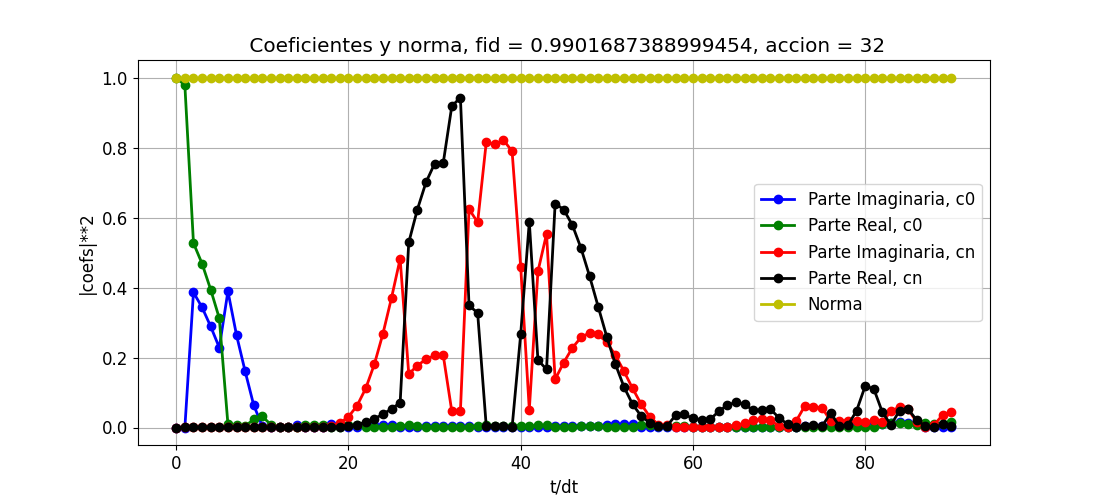

In [23]:
axs = plt.figure(figsize=(11,5))
max_fid = np.max(fid_evolution)
max_action = np.argmax(fid_evolution)

plt.plot(np.arange(0,tsteps,1),ev_imag_0, '-o', label = 'Parte Imaginaria, c0')
plt.plot(np.arange(0,tsteps,1),ev_real_0, '-o', label = 'Parte Real, c0')
plt.plot(np.arange(0,tsteps,1),ev_imag_n, '-o', label = 'Parte Imaginaria, cn')
plt.plot(np.arange(0,tsteps,1),ev_real_n, '-o', label = 'Parte Real, cn')
plt.plot(np.arange(0,tsteps,1),ev_norm, '-o', label = 'Norma')
plt.grid()
plt.title(' Coeficientes y norma, fid = {}, accion = {}'.format(max_fid,max_action))
plt.xlabel('t/dt')
plt.ylabel('|coefs|**2')
plt.legend()

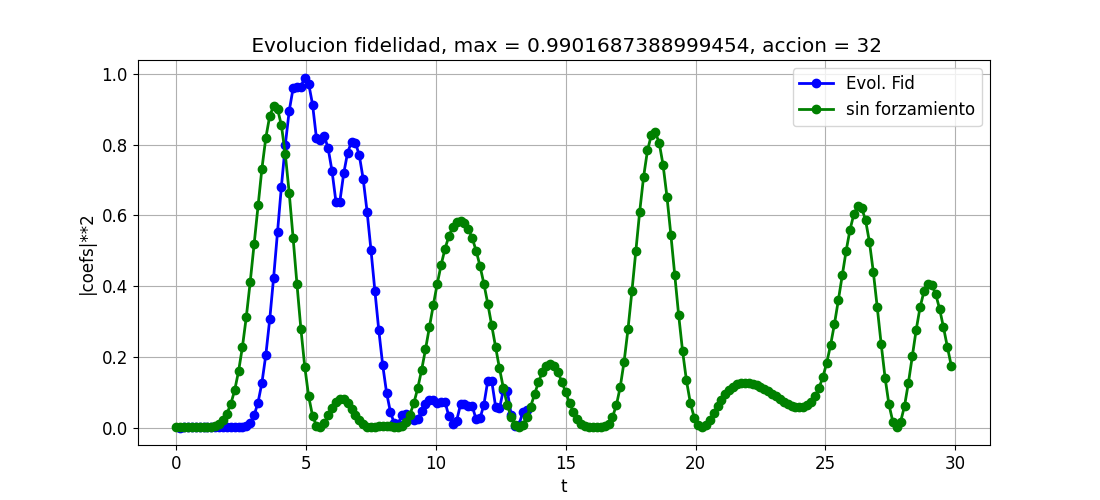

In [24]:
axs = plt.figure(figsize=(11,5))
max_fid = np.max(fid_evolution)
max_action = np.argmax(fid_evolution)

plt.plot(np.arange(1,tsteps,1)*0.15,fid_evolution, '-o', label = 'Evol. Fid')
plt.plot(np.arange(0,200,1)*0.15,nat_evolution, '-o', label = 'sin forzamiento')

plt.grid()
plt.title(' Evolucion fidelidad, max = {}, accion = {}'.format(max_fid,max_action))
plt.xlabel('t')
plt.ylabel('|coefs|**2')
plt.legend()